# Rossman Store - ARIMA / SARIMA Model Implementation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.tsa.ar_model import AR, ARResults
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

from pathlib import Path

In [2]:
# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read the dataset

# file_dir = Path('/Users/khan_m_a/Google Drive/Data_Science/projects/6 Real Time Porjects/Data Science for Business Package/3. Sales Department Data')
# df = pd.read_csv(file_dir / 'train_all.csv',
#                 index_col = 'Date', # Date is read as index
#                 parse_dates = True # date as datetime64
#                 )
df = pd.read_csv('train_store.csv',
                index_col = 'Date', # Date as index
                parse_dates = True  # Date as datetime64
                )

In [4]:
df.index

DatetimeIndex(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
               '2015-07-27', '2015-07-25', '2015-07-24', '2015-07-23',
               '2015-07-22', '2015-07-21',
               ...
               '2013-01-12', '2013-01-11', '2013-01-10', '2013-01-09',
               '2013-01-08', '2013-01-07', '2013-01-05', '2013-01-04',
               '2013-01-03', '2013-01-02'],
              dtype='datetime64[ns]', name='Date', length=844392, freq=None)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844392 entries, 2015-07-31 to 2013-01-02
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 844392 non-null  int64  
 1   Store                      844392 non-null  int64  
 2   DayOfWeek                  844392 non-null  int64  
 3   Sales                      844392 non-null  int64  
 4   Customers                  844392 non-null  int64  
 5   Promo                      844392 non-null  int64  
 6   StateHoliday               844392 non-null  object 
 7   SchoolHoliday              844392 non-null  int64  
 8   StoreType                  844392 non-null  object 
 9   Assortment                 844392 non-null  object 
 10  CompetitionDistance        844392 non-null  float64
 11  CompetitionOpenSinceMonth  844392 non-null  float64
 12  CompetitionOpenSinceYear   844392 non-null  float64
 13  Promo2       

In [6]:
df.head()

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
Date,,,,,,,,,,,,,,,,,,,,
2015-07-31,0,1,5,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
2015-07-30,1,1,4,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2015-07-29,2,1,3,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
2015-07-28,3,1,2,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
2015-07-27,4,1,1,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


In [7]:
df['Sales per customer'] = df['Sales'] / df['Customers']
df.head()

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Sales per customer
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,0,1,5,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,9.482883
2015-07-30,1,1,4,5020,546,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,30,9.194139
2015-07-29,2,1,3,4782,523,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,29,9.143403
2015-07-28,3,1,2,5011,560,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,28,8.948214
2015-07-27,4,1,1,6102,612,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,27,9.970588


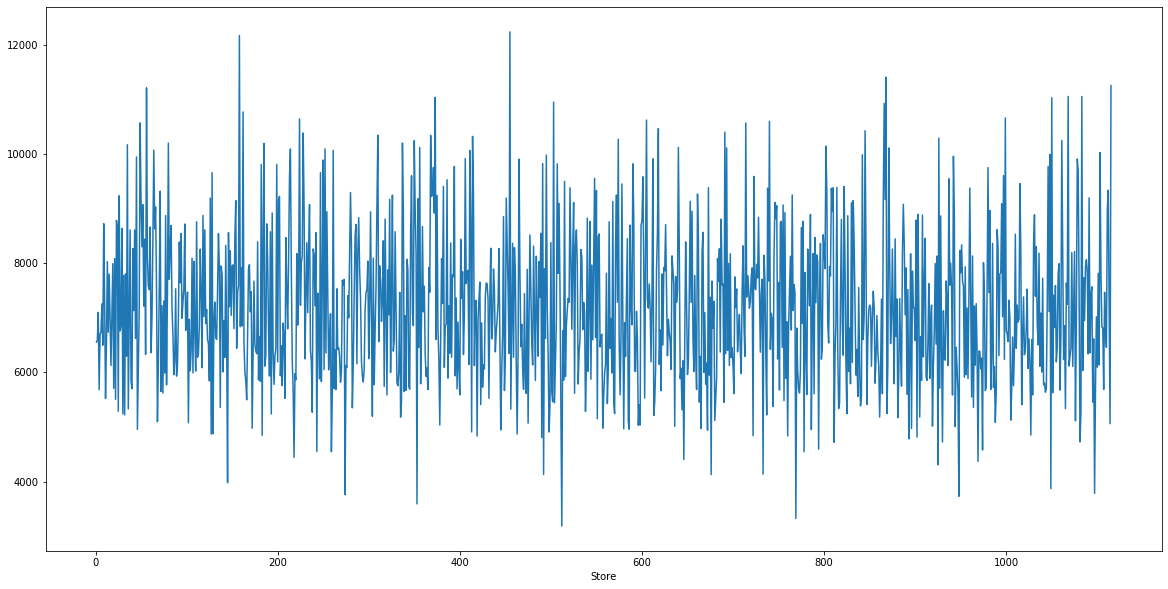

In [8]:
df.groupby('Store')['Sales per customer'].sum().plot(figsize = (20,10));

In [9]:
# checking the biggest store 

biggest_stores = df['Store'].value_counts(ascending = False)
biggest_stores


85      942
1097    942
562     942
335     942
769     942
       ... 
909     607
100     606
744     605
348     597
644     592
Name: Store, Length: 1115, dtype: int64

In [10]:
# let's search only for store = 85
df = df[df['Store'] == 85]
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 942 entries, 2015-07-31 to 2013-01-01
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 942 non-null    int64  
 1   Store                      942 non-null    int64  
 2   DayOfWeek                  942 non-null    int64  
 3   Sales                      942 non-null    int64  
 4   Customers                  942 non-null    int64  
 5   Promo                      942 non-null    int64  
 6   StateHoliday               942 non-null    object 
 7   SchoolHoliday              942 non-null    int64  
 8   StoreType                  942 non-null    object 
 9   Assortment                 942 non-null    object 
 10  CompetitionDistance        942 non-null    float64
 11  CompetitionOpenSinceMonth  942 non-null    float64
 12  CompetitionOpenSinceYear   942 non-null    float64
 13  Promo2                     942 

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day,Sales per customer
Date,,,,,,,,,,,,,,,,,,,,,
2015-07-31,63451,85,5,7791,971,1,0,1,b,a,...,10.0,2011.0,0,0.0,0.0,0,2015,7,31,8.023687
2015-07-30,63452,85,4,7187,1000,1,0,1,b,a,...,10.0,2011.0,0,0.0,0.0,0,2015,7,30,7.187000
2015-07-29,63453,85,3,7719,889,1,0,1,b,a,...,10.0,2011.0,0,0.0,0.0,0,2015,7,29,8.682790
2015-07-28,63454,85,2,7533,920,1,0,1,b,a,...,10.0,2011.0,0,0.0,0.0,0,2015,7,28,8.188043
2015-07-27,63455,85,1,7788,956,1,0,1,b,a,...,10.0,2011.0,0,0.0,0.0,0,2015,7,27,8.146444


In [11]:
# checking for weekly
print(len(df))
df = df.resample(rule = 'W').sum()
df.index.freq = 'W'
print(len(df))

942
135


In [70]:
df.head()

,Unnamed: 0,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day,Sales per customer
Date,,,,,,,,,,,,,,,,,
2013-01-06,386337,510,27,37157,5439,0,4,11220.0,60.0,12066.0,0,0.0,0.0,12078,6,21,40.930840
2013-01-13,450681,595,28,53161,7079,5,0,13090.0,70.0,14077.0,0,0.0,0.0,14091,7,70,52.695702
2013-01-20,450632,595,28,43603,6401,0,0,13090.0,70.0,14077.0,0,0.0,0.0,14091,7,119,47.142420
2013-01-27,450583,595,28,49299,6685,5,0,13090.0,70.0,14077.0,0,0.0,0.0,14091,7,168,51.624379
2013-02-03,450534,595,28,47241,6694,0,0,13090.0,70.0,14077.0,0,0.0,0.0,14091,10,124,48.851007


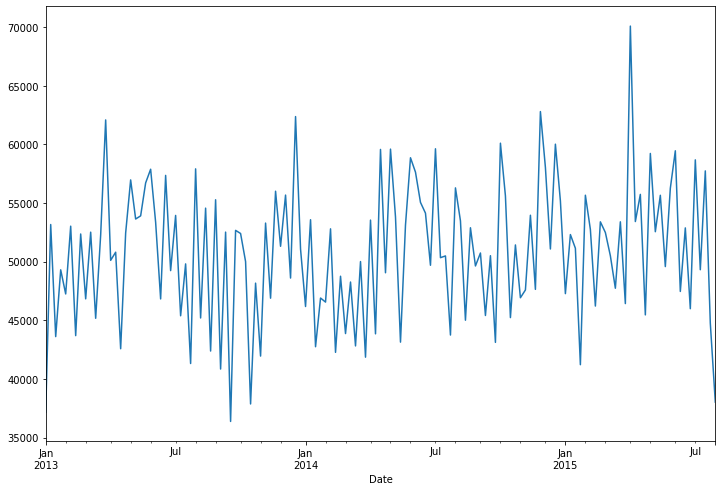

In [13]:
df['Sales'].plot(figsize = (12,8));

# Moving Average and Exponential Weighted Average

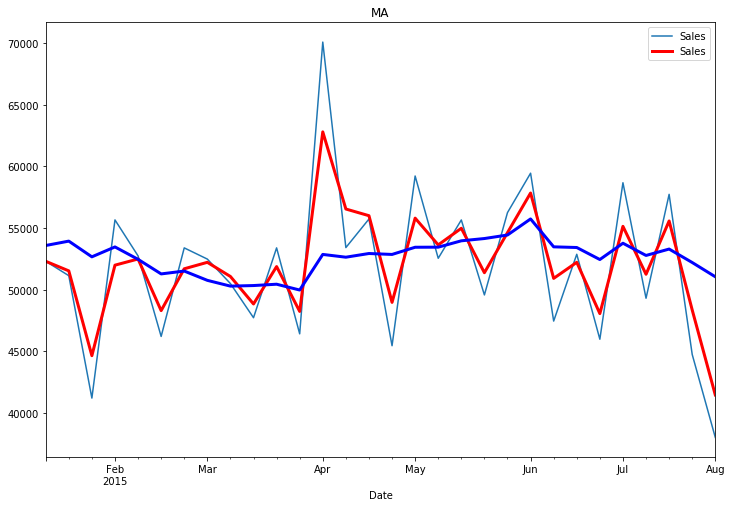

In [14]:
# visualize on last year sales with rolling window / Expnontial Weigheing average

# span = 52
# alpha = 2/(span + 1)

df['Sales'].iloc[-30:].plot(legend = True, figsize = (12,8));
df['Sales'].iloc[-30:].ewm(span= 2, adjust = False).mean().plot(color = 'r', linewidth = 3)
df.rolling(window = 10).mean()['Sales'].iloc[-30:].plot(title = 'MA', legend= True, color = 'b', linewidth = 3);


In [15]:
df.index

DatetimeIndex(['2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27',
               '2013-02-03', '2013-02-10', '2013-02-17', '2013-02-24',
               '2013-03-03', '2013-03-10',
               ...
               '2015-05-31', '2015-06-07', '2015-06-14', '2015-06-21',
               '2015-06-28', '2015-07-05', '2015-07-12', '2015-07-19',
               '2015-07-26', '2015-08-02'],
              dtype='datetime64[ns]', name='Date', length=135, freq='W-SUN')

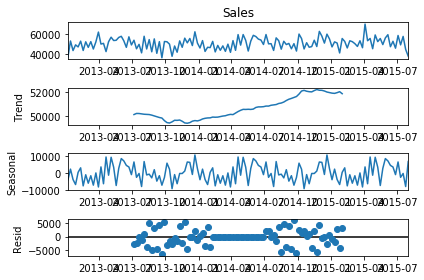

In [16]:
results = seasonal_decompose(df['Sales'], model = 'additive');
results.plot();

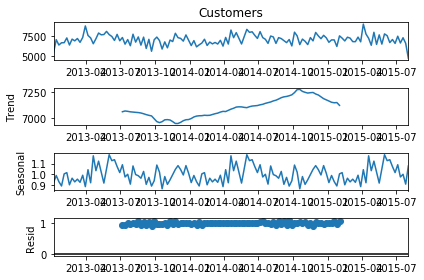

In [17]:
results = seasonal_decompose(df['Customers'], model = 'multiplicative');
results.plot();

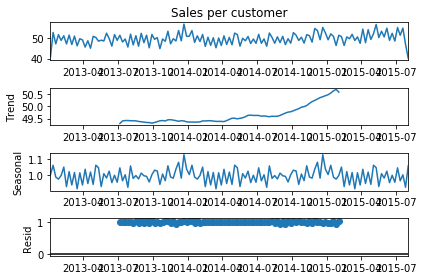

In [18]:
results = seasonal_decompose(df['Sales per customer'], model = 'multiplicative');
results.plot();

# Check for Stationary (AD Fuller Test)

In [19]:
# Augmented Dickey Fuller Test


def adfuller_test(series):
    
    result = adfuller(series.dropna(), autolag = 'AIC') # dropna for removing differentiated data
    labels = ['ADF Test', 'p_value', 'No. of leg used', 'No. of observations']
    
    out = pd.Series(result[0:4], index = labels)
    print(out.head())
    
    if result[1] <= 0.5: # if p_value is less than significant level
        print('Reject the Null Hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('Fail to reject the Null Hypothesis')
        print('Data has unit root and is not stationary')
    


In [20]:
adfuller_test(df['Sales'])

ADF Test                -4.272816
p_value                  0.000495
No. of leg used          3.000000
No. of observations    131.000000
dtype: float64
Reject the Null Hypothesis
Data has no unit root and is stationary


In [21]:
adfuller_test(df['Customers'])

ADF Test                -5.200988
p_value                  0.000009
No. of leg used          1.000000
No. of observations    133.000000
dtype: float64
Reject the Null Hypothesis
Data has no unit root and is stationary


In [22]:
adfuller_test(df['Sales per customer'])

ADF Test                -3.666745
p_value                  0.004606
No. of leg used         11.000000
No. of observations    123.000000
dtype: float64
Reject the Null Hypothesis
Data has no unit root and is stationary


# Forecasting in Time Series

In [23]:
# split the data into train and test
train = df.iloc[:-30]
test = df.iloc[-30:]
print(len(df), len(train), len(test))

135 105 30


# AR Model

NameError: name 'xx' is not defined

In [25]:
# AR model
model = AR(train['Sales'])
AR1_fit = model.fit(maxlag = 1, method = 'mle')
AR1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      S  -                  a                  l
Model:                          AR(1)   Log Likelihood               -1057.521
Method:                           mle   S.D. of innovations           5725.180
Date:                Fri, 27 Nov 2020   AIC                             17.362
Time:                        19:42:42   BIC                             17.438
Sample:                    01-06-2013   HQIC                            17.393
                         - 01-04-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.622e+04   5047.992     11.137      0.000    4.63e+04    6.61e+04
L1.Sales      -0.1144      0.099     -1.154      0.249      -0.309       0.080
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -8.7398           +0.0000j            8.7398            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
# get the predictions
start = len(train)
end = len(train)+len(test)-1
pred_ar1 = AR1_fit.predict(start = start, end = end, dynamic= False).rename('AR1 Predictions')


In [27]:
pred_ar1

2015-01-11    50809.801018
2015-01-18    50404.553504
2015-01-25    50450.921312
2015-02-01    50445.615977
2015-02-08    50446.223006
2015-02-15    50446.153550
2015-02-22    50446.161497
2015-03-01    50446.160588
2015-03-08    50446.160692
2015-03-15    50446.160680
2015-03-22    50446.160682
2015-03-29    50446.160681
2015-04-05    50446.160681
2015-04-12    50446.160681
2015-04-19    50446.160681
2015-04-26    50446.160681
2015-05-03    50446.160681
2015-05-10    50446.160681
2015-05-17    50446.160681
2015-05-24    50446.160681
2015-05-31    50446.160681
2015-06-07    50446.160681
2015-06-14    50446.160681
2015-06-21    50446.160681
2015-06-28    50446.160681
2015-07-05    50446.160681
2015-07-12    50446.160681
2015-07-19    50446.160681
2015-07-26    50446.160681
2015-08-02    50446.160681
Freq: W-SUN, Name: AR1 Predictions, dtype: float64

In [28]:
len(test)

30

In [29]:
# compare predictions to expected value
for i in range(10):#len(pred_ar1)):
    print('Predicted : {} and Expected = {}'.format( pred_ar1[i], test['Sales'][i]))

Predicted : 50809.80101822621 and Expected = 52305
Predicted : 50404.55350418157 and Expected = 51137
Predicted : 50450.92131163158 and Expected = 41209
Predicted : 50445.61597725392 and Expected = 55660
Predicted : 50446.223005586864 and Expected = 52741
Predicted : 50446.1535503234 and Expected = 46209
Predicted : 50446.16149728956 and Expected = 53391
Predicted : 50446.16058800972 and Expected = 52483
Predicted : 50446.16069204814 and Expected = 50497
Predicted : 50446.160680144225 and Expected = 47728


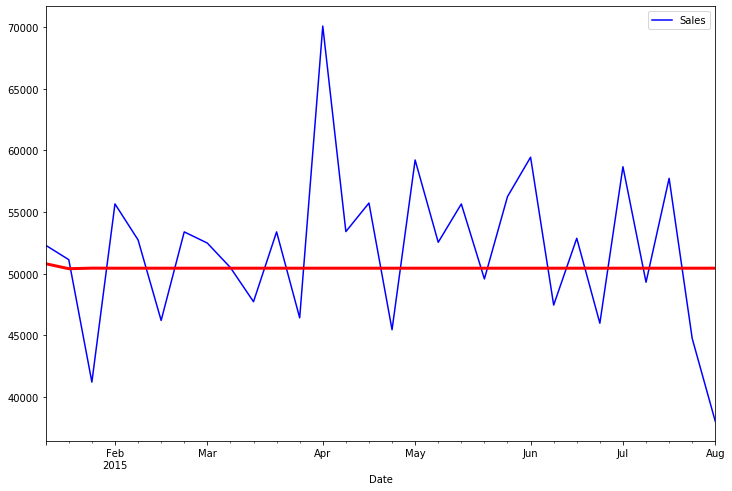

In [30]:

test['Sales'].plot(legend = True, figsize = (12,8), color = 'b');
pred_ar1.plot(color = 'r', linewidth = 3)

In [31]:
# let statsmodel fit on different value of P for AR(P)
model = AR(train['Sales'])
AR_fit = model.fit( method = 'mle')
AR_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               AR Model Results                               
==============================================================================
Dep. Variable:                      S  -                  a                  l
Model:                         AR(12)   Log Likelihood               -1044.547
Method:                           mle   S.D. of innovations           5023.674
Date:                Fri, 27 Nov 2020   AIC                             17.311
Time:                        19:42:55   BIC                             17.664
Sample:                    01-06-2013   HQIC                            17.454
                         - 01-04-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.111e+04   1.33e+04      3.835      0.000     2.5e+04    7.72e+04
L1.Sales      -0.0862      0.098     -0.878      0.380      -0.279       0.106
L2.Sales       0.2326      0.097      2.405      0.016       0.043       0.422
L3.Sales       0.0082      0.100      0.082      0.934      -0.187       0.204
L4.Sales       0.1425      0.100      1.432      0.152      -0.053       0.338
L5.Sales      -0.0005      0.102     -0.005      0.996      -0.200       0.199
L6.Sales       0.1151      0.104      1.103      0.270      -0.089       0.320
L7.Sales      -0.1225      0.103     -1.189      0.235      -0.324       0.079
L8.Sales       0.1153      0.103      1.116      0.264      -0.087       0.318
L9.Sales       0.0352      0.102      0.345      0.730      -0.165       0.235
L10.Sales     -0.1249      0.102     -1.229      0.219      -0.324       0.074
L11.Sales     -0.1502      0.100     -1.501      0.133      -0.346       0.046
L12.Sales     -0.1776      0.101     -1.759      0.079      -0.375       0.020
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0376           -0.2467j            1.0666           -0.0372
AR.2             1.0376           +0.2467j            1.0666            0.0372
AR.3             0.7603           -0.8156j            1.1150           -0.1306
AR.4             0.7603           +0.8156j            1.1150            0.1306
AR.5             0.1866           -1.1118j            1.1274           -0.2235
AR.6             0.1866           +1.1118j            1.1274            0.2235
AR.7            -1.1477           -0.1245j            1.1544           -0.4828
AR.8            -1.1477           +0.1245j            1.1544            0.4828
AR.9            -0.8061           -0.8495j            1.1711           -0.3708
AR.10           -0.8061           +0.8495j            1.1711            0.3708
AR.11           -0.4537           -1.2281j            1.3093           -0.3063
AR.12           -0.4537           +1.2281j            1.3093            0.3063
------------------------------------------------------------------------------
"""

In [32]:
# another model with AR(12)
model = AR(train['Sales'])
AR12_fit = model.fit(maxlag = 12, method = 'mle')
AR12_fit.summary()

# get the predictions
start = len(train)
end = len(train)+len(test)-1
pred_ar = AR12_fit.predict(start = start, end = end, dynamic= False).rename('AR1 Predictions')


In [33]:
# compare predictions to expected value
for i in range(10):#len(pred_ar1)):
    print('Predicted : {} and Expected = {}'.format( pred_ar[i], test['Sales'][i]))

Predicted : 55286.98558553065 and Expected = 52305
Predicted : 50577.82963403335 and Expected = 51137
Predicted : 53301.722481234625 and Expected = 41209
Predicted : 52493.17915186805 and Expected = 55660
Predicted : 49608.706087694845 and Expected = 52741
Predicted : 48920.62640887607 and Expected = 46209
Predicted : 49234.4686676944 and Expected = 53391
Predicted : 47074.84607380372 and Expected = 52483
Predicted : 48950.86110907451 and Expected = 50497
Predicted : 47632.661434628455 and Expected = 47728


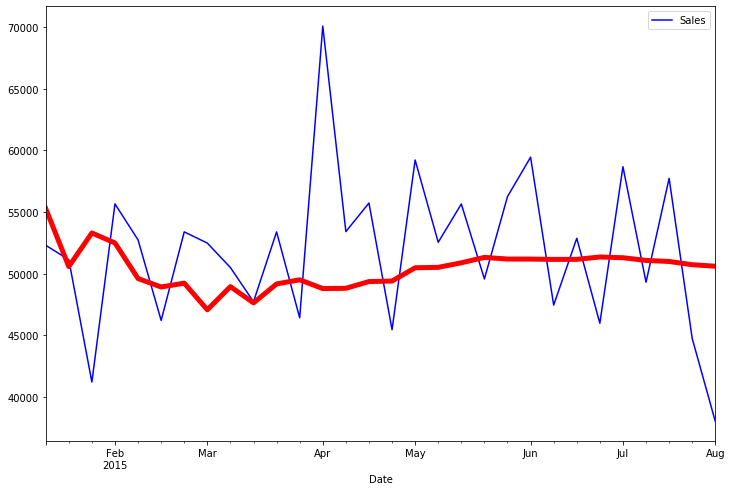

In [34]:

test['Sales'].plot(legend = True, figsize = (12,8), color = 'b');
pred_ar.plot(color = 'r', linewidth = 5)

In [ ]:
# Evaluate model
err1 = mean_squared_error(test['Sales'], pred_ar1)
err19 = mean_squared_error(test['Sales'], pred_ar)

print('AR1 model mean square error is {}'.format(err1))
print('AR19 model mean square error is {}'.format(err19))

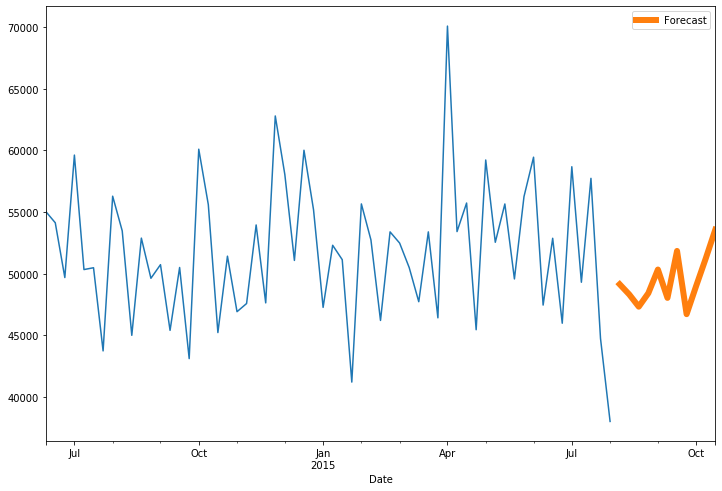

In [35]:
# forecast into future
model = AR(df['Sales'])
AR_fit = model.fit(maxlag = 12, method = 'mle')

#make prediction for next 10 weeks
forecasted_res = AR_fit.predict(start = (len(df)), end = len(df)+10, dynamic = False).rename('Forecast')

#plot the result
df['Sales'][-60:].plot()
forecasted_res.plot(legend = True, figsize = (12,8), linewidth = 6)

# ARIMA Model

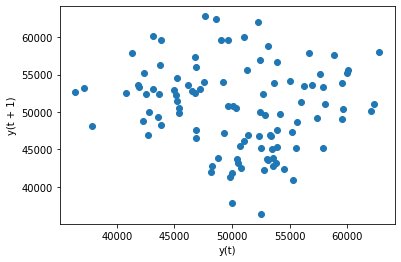

In [36]:
# using pandas in-built function to check lag

from pandas.plotting import lag_plot
lag_plot(train['Sales'])

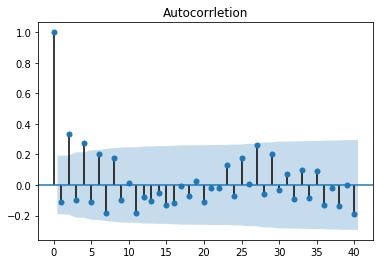

In [37]:
# plotting ACF and PACF
plot_acf(train['Sales'],lags = 40, title = 'Autocorrletion');


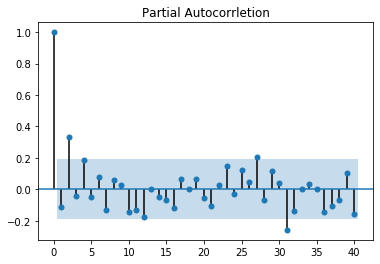

In [38]:
# plotting ACF and PACF
plot_pacf(train['Sales'],lags = 40, title = 'Partial Autocorrletion');



Duke University Statistically Forecasting class:
If the PACF displays a sharp cutoff while the ACF decays more 
slowly (i.e., has significant spikes at higher lags), 
we say that the stationarized series displays an "AR signature,"
meaning that the autocorrelation pattern can be explained more 
easily by adding AR terms than by adding MA terms.


In [44]:
# ARIMA Model
model = ARIMA(train['Sales'], order = (2,0,1))
res_arima = model.fit()
res_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                     ARMA(2, 1)   Log Likelihood               -1050.274
Method:                       css-mle   S.D. of innovations           5333.631
Date:                Fri, 27 Nov 2020   AIC                           2110.549
Time:                        19:48:59   BIC                           2123.819
Sample:                    01-06-2013   HQIC                          2115.926
                         - 01-04-2015                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.041e+04    604.046     83.461      0.000    4.92e+04    5.16e+04
ar.L1.Sales    -0.6356      0.182     -3.496      0.000      -0.992      -0.279
ar.L2.Sales     0.2297      0.114      2.010      0.044       0.006       0.454
ma.L1.Sales     0.6344      0.173      3.674      0.000       0.296       0.973
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1200           +0.0000j            1.1200            0.5000
AR.2            3.8870           +0.0000j            3.8870            0.0000
MA.1           -1.5763           +0.0000j            1.5763            0.5000
-----------------------------------------------------------------------------
"""

In [45]:
# get the predictions
start = len(train)
end = len(train)+len(test)-1
pred_arima = res_arima.predict(start = start, end = end, dynamic= False).rename('AR1MA Predictions')


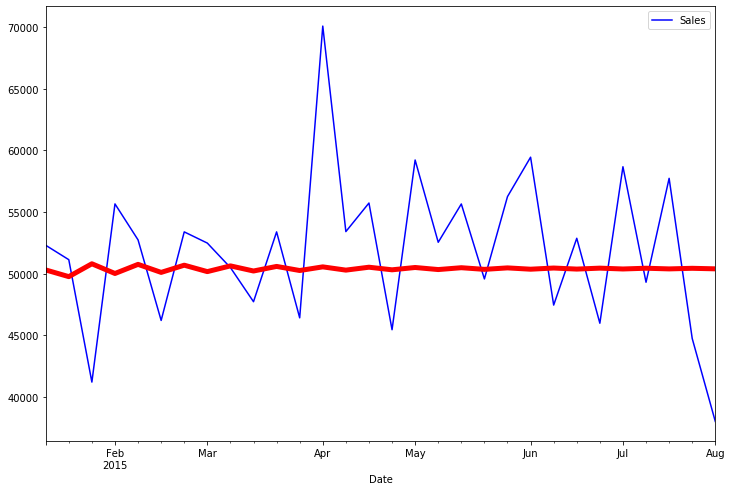

In [46]:

test['Sales'].plot(legend = True, figsize = (12,8), color = 'b');
pred_arima.plot(color = 'r', linewidth = 5)

In [42]:
# Evaluate model
err1 = mean_squared_error(test['Sales'], pred_arima)


print('ARIMA model mean square error is {}'.format(err1))


ARIMA model mean square error is 39956674.827345476


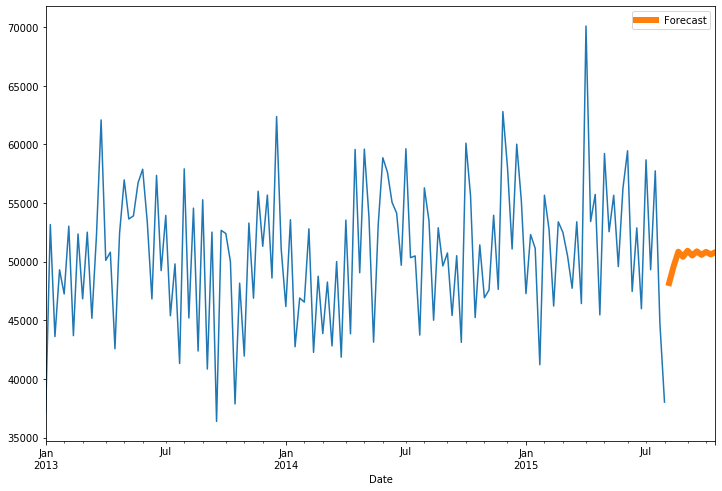

In [60]:
# forecast into future
model = ARIMA(df['Sales'], order = (2,0,1))
AR_fit = model.fit()

#make prediction for next 10 weeks
forecasted_res = AR_fit.predict(start = (len(df)), end = len(df)+10, dynamic = False).rename('Forecast')

#plot the result
df['Sales'][0:].plot()
forecasted_res.plot(legend = True, figsize = (12,8), linewidth = 6)

# SARIMAX(p,d,q) (P,D,Q,m) Model

In [43]:
# using Auto ARIMA to check p,d,q
# https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

res_auto_arima = auto_arima(train['Sales'],
                m=52,
                start_p = 1 , max_p = 6,
                start_q = 1 , max_q = 6, 
                seasonal =True, # diable seasonal component
                d = None, trace=True,
                error_action = 'ignore',  # don't do anything in case of erro
                suppress_warnings = True, # ignore warnings
                stepwise = True
                )
# res_auto_arima.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[52] intercept   : AIC=2110.296, Time=5.82 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=2120.422, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=2120.945, Time=0.99 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=2118.164, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=2575.297, Time=0.01 sec
 ARIMA(1,0,1)(0,0,1)[52] intercept   : AIC=2119.882, Time=0.99 sec
 ARIMA(1,0,1)(1,0,0)[52] intercept   : AIC=2109.689, Time=3.10 sec
 ARIMA(1,0,1)(0,0,0)[52] intercept   : AIC=2123.559, Time=0.10 sec
 ARIMA(1,0,1)(2,0,0)[52] intercept   : AIC=2110.820, Time=18.09 sec
 ARIMA(1,0,1)(2,0,1)[52] intercept   : AIC=2112.296, Time=26.41 sec
 ARIMA(0,0,1)(1,0,0)[52] intercept   : AIC=2123.789, Time=0.36 sec
 ARIMA(2,0,1)(1,0,0)[52] intercept   : AIC=2105.651, Time=1.72 sec
 ARIMA(2,0,1)(0,0,0)[52] intercept   : AIC=2112.637, Time=0.07 sec
 ARIMA(2,0,1)(2,0,0)[52] intercept   : AIC=2107.623, Time=9.47 sec
 ARIMA(2,0,1)(1,0

In [ ]:
# check auto arima with seasonalities

# auto_arima(train['Sales'], seasonal = True, m=52).summary()
# 

In [65]:
# SARIMA Model
#
model = SARIMAX(train['Sales'],
        order = (2,0,1),
        seasonal_order = (1,0,0,52),
        trend = 'ct'
        )
res_sarima = model.fit()
res_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                  105
Model:             SARIMAX(2, 0, 1)x(1, 0, [], 52)   Log Likelihood               -1045.929
Date:                             Fri, 27 Nov 2020   AIC                           2105.859
Time:                                     21:02:07   BIC                           2124.436
Sample:                                 01-06-2013   HQIC                          2113.387
                                      - 01-04-2015                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.022e+04   1.84e+04      2.186      0.029    4161.160    7.63e+04
drift         25.7577     23.776      1.083      0.279     -20.842      72.357
ar.L1         -0.5278      0.307     -1.719      0.086      -1.130       0.074
ar.L2          0.2506      0.173      1.448      0.148      -0.089       0.590
ma.L1          0.4512      0.287      1.575      0.115      -0.110       1.013
ar.S.L52       0.3611      0.121      2.991      0.003       0.124       0.598
sigma2      2.832e+07      6.297    4.5e+06      0.000    2.83e+07    2.83e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.04
Prob(Q):                              0.94   Prob(JB):                         0.98
Heteroskedasticity (H):               1.25   Skew:                             0.04
Prob(H) (two-sided):                  0.51   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.85e+22. Standard errors may be unstable.
"""

In [66]:
# get the predictions
start = len(train)
end = len(train)+len(test)-1
pred_sarima = res_sarima.predict(start = start, end = end, dynamic= False).rename('AR1MA Predictions')


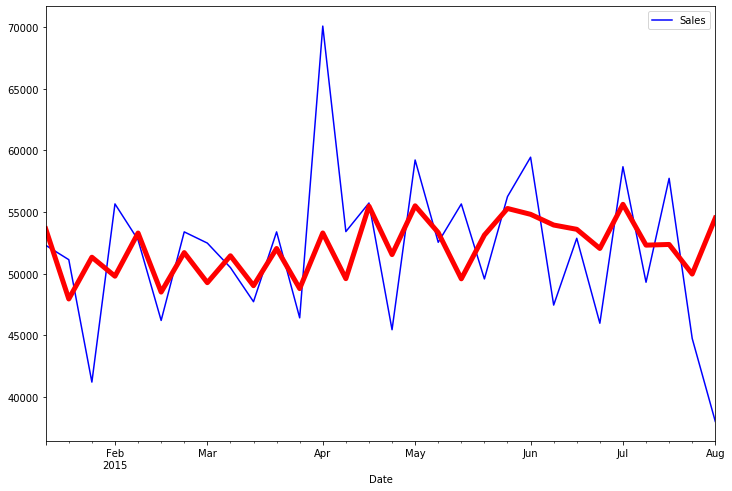

In [68]:

test['Sales'].plot(legend = True, figsize = (12,8), color = 'b');
pred_sarima.plot(color = 'r', linewidth = 5);

In [69]:
# Evaluate model
err1 = mean_squared_error(test['Sales'], pred_sarima)


print('SARIMA model mean square error is {}'.format(err1))


SARIMA model mean square error is 34102152.51026224


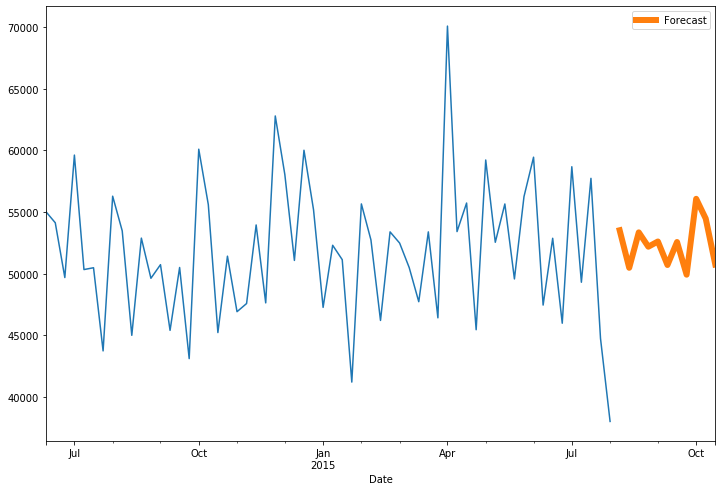

In [55]:
# forecast into future


#make prediction for next 10 weeks
forecasted_res = res_sarima.predict(start = (len(df)), end = len(df)+10, dynamic = False).rename('Forecast')

#plot the result
df['Sales'][-60:].plot()
forecasted_res.plot(legend = True, figsize = (12,8), linewidth = 6)